In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from scripts.ImageDataset import ImageDataset
from models.ResNet import ResNet
from models.FoodCNN import FoodCNN

from utils.print_errors import print_errors

import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [7]:
# Configurazione del dataset e dei DataLoader (come nel tuo codice)
train_gt_path = './ground_truth/train_small.csv'
test_gt_path = './ground_truth/new_val_info.csv'

train_image_path = './train_set/'
test_image_path = './val_set/'

train_dataset = ImageDataset(train_gt_path, train_image_path, train=True)
val_dataset = ImageDataset(train_gt_path, train_image_path, train=False, validation=0.1)
test_dataset = ImageDataset(test_gt_path, test_image_path, train=False, dataset_size=700)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)


In [4]:
resnet = FoodCNN(model_name='resNet18', num_classes=251, device='cuda')
train_loss, val_loss, train_accuracies, val_accuracies = resnet.train_model(train_loader, val_loader, num_epochs=5, lr=0.001)

Epoch 1/5: 100%|████████████████████| 1255/1255 [02:01<00:00, 10.33it/s, accuracy=0.0141, loss=5.93]


Train Accuracy: 0.0141
Validation Loss: 4.5340, Validation Accuracy: 0.1155


Epoch 2/5: 100%|█████████████████████| 1255/1255 [01:35<00:00, 13.17it/s, accuracy=0.052, loss=5.87]


Train Accuracy: 0.0520
Validation Loss: 3.8889, Validation Accuracy: 0.1673


Epoch 3/5: 100%|████████████████████| 1255/1255 [01:34<00:00, 13.24it/s, accuracy=0.0813, loss=5.76]


Train Accuracy: 0.0813
Validation Loss: 3.2543, Validation Accuracy: 0.3048


Epoch 4/5: 100%|█████████████████████| 1255/1255 [01:34<00:00, 13.24it/s, accuracy=0.112, loss=5.21]


Train Accuracy: 0.1124
Validation Loss: 3.0853, Validation Accuracy: 0.3207


Epoch 5/5: 100%|█████████████████████| 1255/1255 [01:33<00:00, 13.44it/s, accuracy=0.141, loss=5.14]


Train Accuracy: 0.1406
Validation Loss: 3.0452, Validation Accuracy: 0.3088


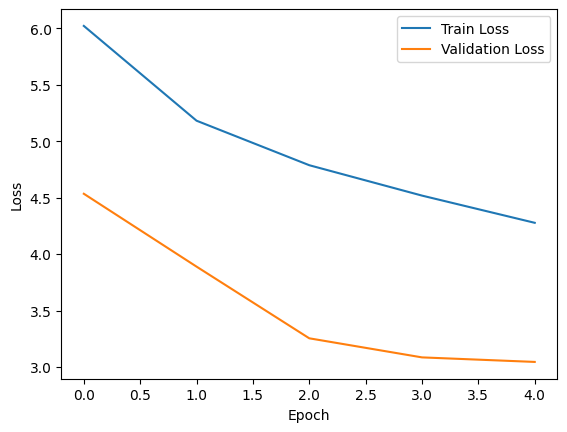

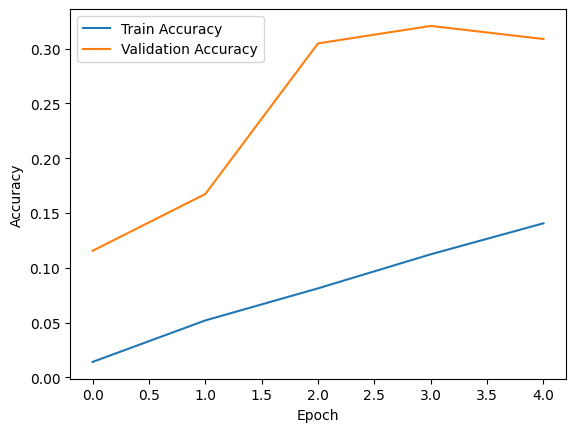

In [5]:
# Plot delle loss e delle accuratezze
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [8]:
prediction = resnet.predict(test_loader)

100%|██████████| 175/175 [00:08<00:00, 21.30it/s]


In [11]:
def get_accuracy(prediction, gt_labels, percentage=True):
    correct = 0
    for i in range(len(prediction)):
        if percentage:
            label_prediction = np.argmax(prediction[i])
        else:
            label_prediction = prediction[i]
        if label_prediction == gt_labels[i]:
            correct += 1
    return correct / len(prediction)
gt_labels = test_dataset.get_labels()
accuracy = get_accuracy(prediction, gt_labels)
print(f'Accuracy: {accuracy}')

Accuracy: 0.1457142857142857
